<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/11%20Computer%20Vision/Face_Recognition_with_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Recognition with OpenCV

In [24]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

## 1.1 Load an image

In [25]:
#get an image from internet
!wget 'https://cdn.pixabay.com/photo/2014/07/11/22/05/baby-390555_1280.jpg'
!ls

--2020-06-29 19:55:31--  https://cdn.pixabay.com/photo/2014/07/11/22/05/baby-390555_1280.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.21.183, 104.18.20.183, 2606:4700::6812:15b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.21.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 201931 (197K) [image/jpeg]
Saving to: ‘baby-390555_1280.jpg.1’

baby-390555_1280.jp 100%[===================>] 197.20K  --.-KB/s    in 0.02s   

2020-06-29 19:55:31 (12.0 MB/s) - ‘baby-390555_1280.jpg.1’ saved [201931/201931]

baby-390555_1280.jpg  baby-390555_1280.jpg.1  sample_data


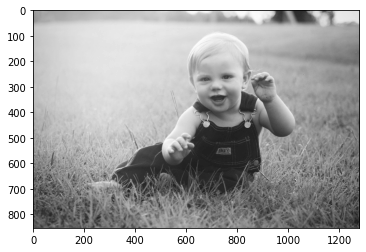

In [26]:
#  Loading the image to be tested
test_image = cv2.imread('baby-390555_1280.jpg')

# Converting to grayscale as opencv expects detector takes in input gray scale images
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying grayscale image
plt.imshow(test_image_gray, cmap='gray')

## 1.2 Load the Haar classifier cascade files

In [29]:
!wget 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
!wget 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml'
!ls

--2020-06-29 19:57:41--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.06s   

2020-06-29 19:57:41 (15.3 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2020-06-29 19:57:42--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.


In [30]:
haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
haar_cascade_eye = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

## 1.3 Detect the face and draw rectangle on original image

In [32]:
faces_rectangles = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

print('Faces found: ', len(faces_rectangles))

Faces found:  1


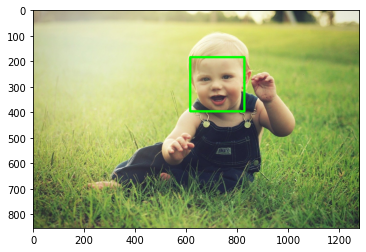

In [36]:
for (x,y,w,h) in faces_rectangles:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 8)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))